# FINAL PROJECT

# GROUP 13

# Ask 1 – Search for a dataset

For the project, our group would like to look into thIS Russian Export Dataset. You can download the zip file for the dataset from here https://www.kaggle.com/datasets/pranav941/russia-to-world-trade14m-data-points. 

Firstly we upload the dataset to Jupyter notebook and check it by applying csvkit and xsv

To complete the modify process, we use csvkit to remove the unnecessary columns and create the new dataset
which we plan to use for the project

# Why this dataset?


**Political Analysis:**

Insights into the geopolitical relationships between Russia and its trading partners. Analyzing the destinations of exports can offer a nuanced understanding of Russia's economic alliances and diplomatic priorities.

**Economical Analysis:**

The dataset allows policymakers, economists, and businesses to track the performance of key export sectors, identify economic drivers, and strategize for sustainable economic growth.

**Forecasting Analysis:**
    
By analyzing past patterns, economists and policymakers can make informed predictions about potential shifts in export priorities, emerging markets, and economic challenges.

# Concerns & Expected Modifications

**Data Quality**

One concern is the quality of the dataset. We need to ensure that the data is accurate, complete, and reliable. It is important to review the data sources and check for any inconsistencies or errors.


**Data Consistency**

Another concern is the consistency of the data. We need to ensure that the data is consistently collected and recorded over time. Any variations or discrepancies in the data could affect the accuracy of our analysis.


**Data Cleaning & Wrangling**

We anticipate that there may be some modifications required to the dataset. This could include cleaning and organizing the data, removing any duplicate or irrelevant information, and standardizing the format of the data for analysis.


# Analytical questions we can answer with this data

1. What are the most exported commodities by Russia? Any significant growth or decline in specific commodities?

2. How did major economic events, such as global recessions or geopolitical events, impact Russia's export patterns?

3. Have there been significant changes in Russia's major trading countries over the years? Which countries are increasing their trading ties with Russia?




# Ask 2: Data Wrangling and Dimensional Modeling

In [1]:
!wget https://mohammedgw.s3.amazonaws.com/Russia+Export.zip

--2023-12-09 08:56:25--  https://mohammedgw.s3.amazonaws.com/Russia+Export.zip
Resolving mohammedgw.s3.amazonaws.com (mohammedgw.s3.amazonaws.com)... 52.217.226.129, 52.217.192.217, 52.216.145.107, ...
Connecting to mohammedgw.s3.amazonaws.com (mohammedgw.s3.amazonaws.com)|52.217.226.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39856084 (38M) [application/zip]
Saving to: ‘Russia+Export.zip.2’

Russia+Export.zip.2 100%[===================>]  38.01M  42.6MB/s    in 0.9s    

2023-12-09 08:56:26 (42.6 MB/s) - ‘Russia+Export.zip.2’ saved [39856084/39856084]



In [3]:
!unzip Russia+Export

Archive:  Russia+Export.zip
   creating: Russia Export/
  inflating: __MACOSX/._Russia Export  
  inflating: Russia Export/partnerAreas.csv  
  inflating: __MACOSX/Russia Export/._partnerAreas.csv  
  inflating: Russia Export/RUStoWorldTrade.csv  
  inflating: __MACOSX/Russia Export/._RUStoWorldTrade.csv  
  inflating: Russia Export/iso3.csv  
  inflating: __MACOSX/Russia Export/._iso3.csv  


In [1]:
!pwd

/home/ubuntu/notebooks/Russia


***Now, we will be counting the CSV file's lines to make sure it's correct, then printing out the file's headers names.***

Also, we will do some statistics on the data!

In [4]:
!wc -l Russia\ Export/RUStoWorldTrade.csv

1384604 Russia Export/RUStoWorldTrade.csv


In [5]:
!csvcut -n Russia\ Export/RUStoWorldTrade.csv

  1: index
  2: Classification
  3: Year
  4: Aggregate Level
  5: Is Leaf Code
  6: Reporter Code
  7: Reporter
  8: Reporter ISO
  9: Partner Code
 10: Partner
 11: Partner ISO
 12: Commodity Code
 13: Commodity
 14: Qty Unit Code
 15: Qty Unit
 16: Qty
 17: Netweight (kg)
 18: Trade Value (US$)


In [5]:
!head -n 10 Russia\ Export/RUStoWorldTrade.csv

index,Classification,Year,Aggregate Level,Is Leaf Code,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$)
0,S4,2011,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,,,75591
1,S4,2012,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,,,27778
2,S4,2015,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,,,2131579
3,S4,2016,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,0,0,9055543
4,S4,2017,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,0,0,19952598
5,S4,2018,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by m

In [10]:
!xsv select 3,9,10,11,12,13,14,15,16,18 Russia\ Export/RUStoWorldTrade.csv | head -n 10000 |  csvstat

  1. "Year"

	Type of data:          Number
	Contains null values:  False
	Unique values:         14
	Smallest value:        2007
	Largest value:         2020
	Sum:                   20141477
	Mean:                  2014.349
	Median:                2015
	StDev:                 4.06
	Most common values:    2018 (1100x)
	                       2017 (995x)
	                       2019 (931x)
	                       2020 (896x)
	                       2016 (735x)

  2. "Partner Code"

	Type of data:          Number
	Contains null values:  False
	Unique values:         5
	Smallest value:        136
	Largest value:         156
	Sum:                   1512392
	Mean:                  151.254
	Median:                152
	StDev:                 5.009
	Most common values:    152 (5135x)
	                       156 (2874x)
	                       140 (1290x)
	                       148 (644x)
	                       136 (56x)

  3. "Partner"

	Type of data:          Text
	Contains null values:  Fa

The below line will show a warning, please ignore it and wait...

In [14]:
!csvcut -c 3,4,9,10,11,12,13,14,15,16,18 Russia\ Export/RUStoWorldTrade.csv | csvsort -c 1 > RusTrades.csv

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter


In [5]:
!wc -l RusTrades.csv

1384604 RusTrades.csv


In [6]:
!head RusTrades.csv

Year,Aggregate Level,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Trade Value (US$)
2007,1,148,Chad,TCD,5,"Chemicals and related products, n.e.s.",1,No Quantity,,925122
2007,2,148,Chad,TCD,56,Fertilizers (other than those of group 272),1,No Quantity,,925122
2007,3,148,Chad,TCD,562,Fertilizers (other than those of group 272),8,Weight in kilograms,3504250,925122
2007,4,148,Chad,TCD,5621,"Mineral or chemical fertilizers, nitrogenous",8,Weight in kilograms,3504250,925122
2007,5,148,Chad,TCD,56216,"Urea, whether/not in aqueous solution",8,Weight in kilograms,3504250,925122
2007,1,152,Chile,CHL,1,Beverages and tobacco,1,No Quantity,,910991
2007,1,152,Chile,CHL,5,"Chemicals and related products, n.e.s.",1,No Quantity,,8633228
2007,1,152,Chile,CHL,6,Manufactured goods classified chiefly by material,1,No Quantity,,4969074
2007,1,152,Chile,CHL,7,Machinery and transport equipment,1,No Quantity,,6606048


In [1]:
%load_ext sql

In [2]:
!createdb -U student final_project

createdb: error: database creation failed: ERROR:  database "final_project" already exists


In [3]:
%sql postgresql://student@/final_project

Creating the table Trades:

In [4]:
%%sql
DROP TABLE IF EXISTS TRADES;

CREATE TABLE TRADES (
    ID SERIAL PRIMARY KEY,
    YEAR INT NOT NULL,
    AGG_CODE INT NOT NULL,
    PARTNER_CODE INT NOT NULL,
    PARTNER VARCHAR(50) NOT NULL,
    PARTNER_ISO VARCHAR(3),
    COMMODITY_CODE VARCHAR(50) NOT NULL,
    COMMODITY VARCHAR(500) NOT NULL,
    QTY_UNIT_CODE INT NOT NULL,
    QTY_UNIT VARCHAR(50) NOT NULL,
    QTY BIGINT,
    VALUE BIGINT NOT NULL
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [5]:
%%sql
SELECT * FROM TRADES

 * postgresql://student@/final_project
0 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value


In [6]:
!pwd

/home/ubuntu/notebooks


In [7]:
%%sql
COPY TRADES (YEAR, AGG_CODE, PARTNER_CODE, PARTNER, PARTNER_ISO, COMMODITY_CODE, COMMODITY, QTY_UNIT_CODE, QTY_UNIT, QTY, VALUE)
FROM '/home/ubuntu/notebooks/RusTrades.csv'
CSV
HEADER;

 * postgresql://student@/final_project
1384603 rows affected.


[]

In [8]:
%%sql
SELECT * FROM TRADES
LIMIT 20

 * postgresql://student@/final_project
20 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value
1,2007,1,148,Chad,TCD,5,"Chemicals and related products, n.e.s.",1,No Quantity,None,925122
2,2007,2,148,Chad,TCD,56,Fertilizers (other than those of group 272),1,No Quantity,None,925122
3,2007,3,148,Chad,TCD,562,Fertilizers (other than those of group 272),8,Weight in kilograms,3504250,925122
4,2007,4,148,Chad,TCD,5621,"Mineral or chemical fertilizers, nitrogenous",8,Weight in kilograms,3504250,925122
5,2007,5,148,Chad,TCD,56216,"Urea, whether/not in aqueous solution",8,Weight in kilograms,3504250,925122
6,2007,1,152,Chile,CHL,1,Beverages and tobacco,1,No Quantity,None,910991
7,2007,1,152,Chile,CHL,5,"Chemicals and related products, n.e.s.",1,No Quantity,None,8633228
8,2007,1,152,Chile,CHL,6,Manufactured goods classified chiefly by material,1,No Quantity,None,4969074
9,2007,1,152,Chile,CHL,7,Machinery and transport equipment,1,No Quantity,None,6606048
10,2007,1,152,Chile,CHL,8,Miscellaneous manufactured articles,1,No Quantity,None,1234063


The below code is to clean the data.

1- NULL values will be replaced with "NA"

2- Zeros in the Value column will be removed.

In [9]:
%%sql
UPDATE TRADES
SET partner_iso = 'NA'
WHERE PARTNER_CODE = 490 or PARTNER_CODE = 568

 * postgresql://student@/final_project
8689 rows affected.


[]

In [10]:
%%sql
SELECT PARTNER_CODE, PARTNER_ISO
FROM TRADES
WHERE PARTNER_CODE = 490 or PARTNER_CODE = 568
LIMIT(20)


 * postgresql://student@/final_project
20 rows affected.


partner_code,partner_iso
490,NA
490,NA
490,NA
490,NA
490,NA
490,NA
490,NA
490,NA
490,NA
490,NA


In [11]:
%%sql
SELECT COUNT(*)
FROM TRADES
WHERE VALUE = 0

 * postgresql://student@/final_project
1 rows affected.


count
1078


In [12]:
%%sql
DELETE FROM TRADES
WHERE VALUE = 0

 * postgresql://student@/final_project
1078 rows affected.


[]

In [13]:
%%sql
SELECT COUNT(*)
FROM TRADES
WHERE VALUE = 0

 * postgresql://student@/final_project
1 rows affected.


count
0


All the below code is for the Dimensional Modeling.

We will create 3 dimensions: Partner, Commodity, and Quantity.

Then, we we will add their Keys as forign keys in the Fact Table (Partner).

In [14]:
%%sql
SELECT DISTINCT PARTNER_CODE, PARTNER, PARTNER_ISO
FROM TRADES
ORDER BY PARTNER_CODE
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


partner_code,partner,partner_iso
4,Afghanistan,AFG
8,Albania,ALB
10,Antarctica,ATA
12,Algeria,DZA
16,American Samoa,ASM
20,Andorra,AND
24,Angola,AGO
28,Antigua and Barbuda,ATG
31,Azerbaijan,AZE
32,Argentina,ARG


In [15]:
%%sql
DROP TABLE IF EXISTS PARTNER;

CREATE TABLE PARTNER (
    key SERIAL PRIMARY KEY,
    CODE INTEGER UNIQUE,
    name VARCHAR(150),
    ISO VARCHAR(3)
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [16]:
%%sql
INSERT INTO PARTNER (CODE, name, ISO)
SELECT DISTINCT PARTNER_CODE, PARTNER, PARTNER_ISO
FROM TRADES
ORDER BY PARTNER_CODE;

 * postgresql://student@/final_project
225 rows affected.


[]

In [17]:
%%sql
SELECT *
FROM PARTNER
LIMIT(25);

 * postgresql://student@/final_project
25 rows affected.


key,code,name,iso
1,4,Afghanistan,AFG
2,8,Albania,ALB
3,10,Antarctica,ATA
4,12,Algeria,DZA
5,16,American Samoa,ASM
6,20,Andorra,AND
7,24,Angola,AGO
8,28,Antigua and Barbuda,ATG
9,31,Azerbaijan,AZE
10,32,Argentina,ARG


In [18]:
%%sql
ALTER TABLE TRADES
ADD COLUMN PARTNER_KEY INTEGER,
ADD CONSTRAINT FK_PARTNER
 FOREIGN KEY (PARTNER_KEY)
 REFERENCES PARTNER(key);

 * postgresql://student@/final_project
Done.


[]

In [19]:
%%sql
SELECT*
FROM TRADES
limit(5)

 * postgresql://student@/final_project
5 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value,partner_key
1384202,2020,4,887,Yemen,YEM,8744,"Instruments and apparatus for physical or chemical analysis (e.g., polarimeters, refractometers, spectrometers, gas or smoke analysis apparatus); instruments and apparatus for measuring or checking viscosity, porosity, expansion, surface tension or the li",5,Number of items,1,7925,None
1384203,2020,4,887,Yemen,YEM,8745,"Measuring, controlling and scientific instruments, n.e.s.",5,Number of items,1,27,None
1384204,2020,4,887,Yemen,YEM,8749,"Parts & accessories for machines, appliances, instruments & apparatus, n.e.s.",8,Weight in kilograms,3,1631,None
1384205,2020,4,887,Yemen,YEM,8928,"Printed matter, n.e.s.",8,Weight in kilograms,919298,26067832,None
1384206,2020,4,887,Yemen,YEM,8931,"Articles for the conveyance or packing of goods, of plastics; stoppers, lids, caps and other closures, of plastics",8,Weight in kilograms,428,1368,None


In [20]:
%%sql
UPDATE TRADES AS t
SET PARTNER_KEY = p.key
FROM PARTNER AS p
WHERE t.partner_code = p.CODE
 and t.partner = p.name
 and t.partner_iso = p.ISO;

 * postgresql://student@/final_project
1383525 rows affected.


[]

In [21]:
%%sql
SELECT *
FROM TRADES
Limit(5);

 * postgresql://student@/final_project
5 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value,partner_key
1384475,2020,3,894,Zambia,ZMB,899,"Miscellaneous manufactured articles, n.e.s.",5,Number of items,80,189,225
1384476,2020,3,894,Zambia,ZMB,931,Special transactions and commodities not classified according to kind,1,No Quantity,0,530000,225
1384526,2020,5,716,Zimbabwe,ZWE,87115,Other astronomical instruments (excluding instruments for radio astronomy),5,Number of items,3,2451,190
1384564,2020,3,716,Zimbabwe,ZWE,591,"Insecticides, rodenticides, fungicides, herbicides, anti-sprouting products and plant-growth regulators, disinfectants and similar products, put up in forms or packings for retail sale or as preparations or articles (e.g., sulphur-treated bands, wicks and",8,Weight in kilograms,9431,242408,190
30023,2007,2,490,"Other Asia, nes",NA,11,Beverages,1,No Quantity,None,9537,128


In [22]:
%%sql
SELECT DISTINCT AGG_CODE, COMMODITY_CODE, COMMODITY
FROM TRADES
ORDER BY AGG_CODE
limit(10);

 * postgresql://student@/final_project
10 rows affected.


agg_code,commodity_code,commodity
0,TOTAL,All Commodities
1,0,Food and live animals
1,1,Beverages and tobacco
1,2,"Crude materials, inedible, except fuels"
1,3,"Mineral fuels, lubricants and related materials"
1,4,"Animal and vegetable oils, fats and waxes"
1,5,"Chemicals and related products, n.e.s."
1,6,Manufactured goods classified chiefly by material
1,7,Machinery and transport equipment
1,8,Miscellaneous manufactured articles


In [23]:
%%sql
DROP TABLE IF EXISTS COMMODITY;

CREATE TABLE COMMODITY (
    key SERIAL PRIMARY KEY,
    A_CODE INTEGER,
    C_CODE VARCHAR(10),
    name VARCHAR(500)
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [24]:
%%sql
INSERT INTO COMMODITY (A_CODE, C_CODE, name)
SELECT DISTINCT AGG_CODE, COMMODITY_CODE, COMMODITY
FROM TRADES
AGG_CODE;

 * postgresql://student@/final_project
3979 rows affected.


[]

In [25]:
%%sql
SELECT *
FROM COMMODITY
LIMIT(25);

 * postgresql://student@/final_project
25 rows affected.


key,a_code,c_code,name
1,0,TOTAL,All Commodities
2,1,0,Food and live animals
3,1,1,Beverages and tobacco
4,1,2,"Crude materials, inedible, except fuels"
5,1,3,"Mineral fuels, lubricants and related materials"
6,1,4,"Animal and vegetable oils, fats and waxes"
7,1,5,"Chemicals and related products, n.e.s."
8,1,6,Manufactured goods classified chiefly by material
9,1,7,Machinery and transport equipment
10,1,8,Miscellaneous manufactured articles


In [26]:
%%sql
ALTER TABLE TRADES
ADD COLUMN COMMODITY_KEY INTEGER,
ADD CONSTRAINT FK_COMMODITY
 FOREIGN KEY (COMMODITY_KEY)
 REFERENCES COMMODITY(key);

 * postgresql://student@/final_project
Done.


[]

In [27]:
%%sql
SELECT*
FROM TRADES
limit(5)

 * postgresql://student@/final_project
5 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value,partner_key,commodity_key
1384475,2020,3,894,Zambia,ZMB,899,"Miscellaneous manufactured articles, n.e.s.",5,Number of items,80,189,225,None
1384476,2020,3,894,Zambia,ZMB,931,Special transactions and commodities not classified according to kind,1,No Quantity,0,530000,225,None
1384526,2020,5,716,Zimbabwe,ZWE,87115,Other astronomical instruments (excluding instruments for radio astronomy),5,Number of items,3,2451,190,None
1384564,2020,3,716,Zimbabwe,ZWE,591,"Insecticides, rodenticides, fungicides, herbicides, anti-sprouting products and plant-growth regulators, disinfectants and similar products, put up in forms or packings for retail sale or as preparations or articles (e.g., sulphur-treated bands, wicks and",8,Weight in kilograms,9431,242408,190,None
30023,2007,2,490,"Other Asia, nes",NA,11,Beverages,1,No Quantity,None,9537,128,None


In [28]:
%%sql
UPDATE TRADES AS t
SET COMMODITY_KEY = c.key
FROM COMMODITY AS c
WHERE t.agg_code = c.a_code
 and t.commodity_code = c.c_code
 and t.commodity = c.name;

 * postgresql://student@/final_project
1383525 rows affected.


[]

In [29]:
%%sql
SELECT *
FROM TRADES
Limit(5);

 * postgresql://student@/final_project
5 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value,partner_key,commodity_key
1384475,2020,3,894,Zambia,ZMB,899,"Miscellaneous manufactured articles, n.e.s.",5,Number of items,80,189,225,335
1384476,2020,3,894,Zambia,ZMB,931,Special transactions and commodities not classified according to kind,1,No Quantity,0,530000,225,336
1384526,2020,5,716,Zimbabwe,ZWE,87115,Other astronomical instruments (excluding instruments for radio astronomy),5,Number of items,3,2451,190,3744
1384564,2020,3,716,Zimbabwe,ZWE,591,"Insecticides, rodenticides, fungicides, herbicides, anti-sprouting products and plant-growth regulators, disinfectants and similar products, put up in forms or packings for retail sale or as preparations or articles (e.g., sulphur-treated bands, wicks and",8,Weight in kilograms,9431,242408,190,197
30023,2007,2,490,"Other Asia, nes",NA,11,Beverages,1,No Quantity,None,9537,128,22


In [30]:
%%sql
SELECT DISTINCT QTY_UNIT_CODE, QTY_UNIT, QTY
FROM TRADES
ORDER BY QTY
limit(10);

 * postgresql://student@/final_project
10 rows affected.


qty_unit_code,qty_unit,qty
1,No Quantity,0
2,Area in square metres,0
5,Number of items,0
6,Number of pairs,0
7,Volume in litres,0
8,Weight in kilograms,0
9,Thousands of items,0
12,Volume in cubic meters,0
13,Weight in carats,0
2,Area in square metres,1


In [31]:
%%sql
DROP TABLE IF EXISTS QUANTITY;

CREATE TABLE QUANTITY (
    key SERIAL PRIMARY KEY,
    Q_CODE INTEGER,
    Q_UNIT VARCHAR(50),
    QTY BIGINT
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [32]:
%%sql
INSERT INTO QUANTITY (Q_CODE, Q_UNIT, QTY)
SELECT DISTINCT QTY_UNIT_CODE, QTY_UNIT, QTY
FROM TRADES
ORDER BY QTY;

 * postgresql://student@/final_project
278175 rows affected.


[]

In [33]:
%%sql
SELECT *
FROM QUANTITY
LIMIT(25);

 * postgresql://student@/final_project
25 rows affected.


key,q_code,q_unit,qty
1,1,No Quantity,0
2,2,Area in square metres,0
3,5,Number of items,0
4,6,Number of pairs,0
5,7,Volume in litres,0
6,8,Weight in kilograms,0
7,9,Thousands of items,0
8,12,Volume in cubic meters,0
9,13,Weight in carats,0
10,2,Area in square metres,1


In [34]:
%%sql
ALTER TABLE TRADES
ADD COLUMN QUANTITY_KEY INTEGER,
ADD CONSTRAINT FK_QUANTITY
 FOREIGN KEY (QUANTITY_KEY)
 REFERENCES QUANTITY(key);

 * postgresql://student@/final_project
Done.


[]

In [35]:
%%sql
SELECT*
FROM TRADES
limit(5)

 * postgresql://student@/final_project
5 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value,partner_key,commodity_key,quantity_key
1384475,2020,3,894,Zambia,ZMB,899,"Miscellaneous manufactured articles, n.e.s.",5,Number of items,80,189,225,335,None
1384476,2020,3,894,Zambia,ZMB,931,Special transactions and commodities not classified according to kind,1,No Quantity,0,530000,225,336,None
1384526,2020,5,716,Zimbabwe,ZWE,87115,Other astronomical instruments (excluding instruments for radio astronomy),5,Number of items,3,2451,190,3744,None
1384564,2020,3,716,Zimbabwe,ZWE,591,"Insecticides, rodenticides, fungicides, herbicides, anti-sprouting products and plant-growth regulators, disinfectants and similar products, put up in forms or packings for retail sale or as preparations or articles (e.g., sulphur-treated bands, wicks and",8,Weight in kilograms,9431,242408,190,197,None
30023,2007,2,490,"Other Asia, nes",NA,11,Beverages,1,No Quantity,None,9537,128,22,None


In [36]:
%%sql
UPDATE TRADES AS t
SET QUANTITY_KEY = q.key
FROM QUANTITY AS q
WHERE t.qty_unit_code = q.q_code
 and t.qty_unit = q.q_unit
 and t.qty = q.qty;

 * postgresql://student@/final_project
1282816 rows affected.


[]

In [37]:
%%sql
SELECT*
FROM TRADES
limit(5)

 * postgresql://student@/final_project
5 rows affected.


id,year,agg_code,partner_code,partner,partner_iso,commodity_code,commodity,qty_unit_code,qty_unit,qty,value,partner_key,commodity_key,quantity_key
1384476,2020,3,894,Zambia,ZMB,931,Special transactions and commodities not classified according to kind,1,No Quantity,0,530000,225,336,1
1384475,2020,3,894,Zambia,ZMB,899,"Miscellaneous manufactured articles, n.e.s.",5,Number of items,80,189,225,335,533
1384526,2020,5,716,Zimbabwe,ZWE,87115,Other astronomical instruments (excluding instruments for radio astronomy),5,Number of items,3,2451,190,3744,28
1384564,2020,3,716,Zimbabwe,ZWE,591,"Insecticides, rodenticides, fungicides, herbicides, anti-sprouting products and plant-growth regulators, disinfectants and similar products, put up in forms or packings for retail sale or as preparations or articles (e.g., sulphur-treated bands, wicks and",8,Weight in kilograms,9431,242408,190,197,23774
30023,2007,2,490,"Other Asia, nes",NA,11,Beverages,1,No Quantity,None,9537,128,22,None


In [38]:
%%sql
ALTER TABLE TRADES
DROP COLUMN id,
DROP COLUMN agg_code,
DROP COLUMN partner_code,
DROP COLUMN partner,
DROP COLUMN partner_iso,
DROP COLUMN commodity_code,
DROP COLUMN commodity,
DROP COLUMN qty_unit_code,
DROP COLUMN qty_unit,
DROP COLUMN qty;

 * postgresql://student@/final_project
Done.


[]

In [39]:
%%sql
SELECT *
FROM TRADES
Limit 10;

 * postgresql://student@/final_project
10 rows affected.


year,value,partner_key,commodity_key,quantity_key
2020,530000,225,336,1
2020,189,225,335,533
2020,2451,190,3744,28
2020,242408,190,197,23774
2007,9537,128,22,None
2012,33102,128,71,None
2013,2500,128,22,None
2015,45809,128,22,None
2020,79,190,55,1
2010,13455079,128,2734,228349


In [40]:
%%sql
SELECT COUNT(*)
from TRADES;

 * postgresql://student@/final_project
1 rows affected.


count
1383525


# Ask 3: Data analysis and visualization

# Q1: Which countries have been the top partners for Russia in terms of trade value throughout the years?

In [41]:
%%sql

SELECT p.name, SUM(t.value) AS total_trade_value
FROM TRADES t
JOIN PARTNER p ON t.partner_key = p.key
GROUP BY p.name
ORDER BY total_trade_value DESC
Limit 10;



 * postgresql://student@/final_project
10 rows affected.


name,total_trade_value
Netherlands,2832996596334
China,2023158276386
Germany,1281290819365
Turkey,964200823854
Italy,936478026840
Poland,828736173364
Japan,742760953564
Belarus,740227763786
Rep. of Korea,737164221640
USA,693061195584


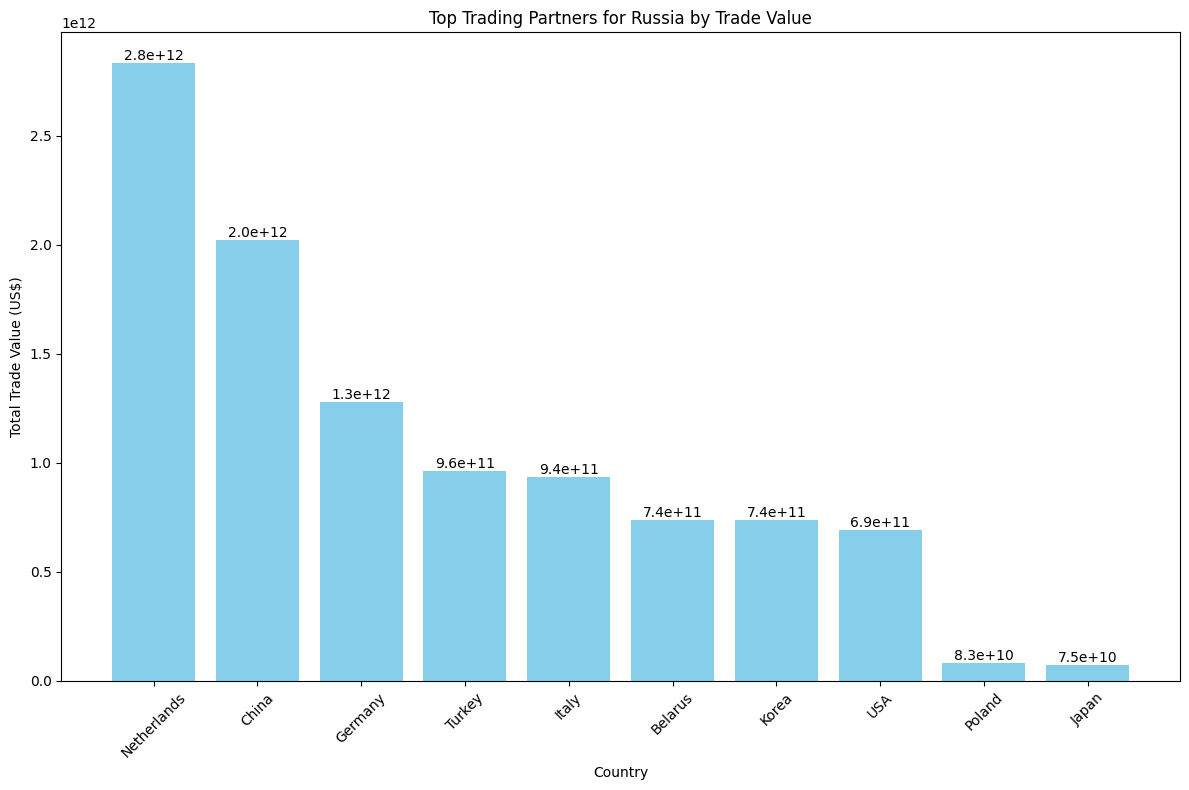

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame structure
data = {
    'name': ['Netherlands', 'China', 'Germany', 'Turkey', 'Italy', 'Poland', 'Japan', 'Belarus', 'Korea', 'USA'],
    'total_trade_value': [2832996596334, 2023158276386, 1281290819365, 964200823854, 936478026840,
                          82736173364, 74726953564, 740227673786, 737164221640, 693061195584]
}
# Create a DataFrame
df = pd.DataFrame(data)


# Sort the DataFrame for better visualization
top_partners_df = df.sort_values(by='total_trade_value', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_partners_df['name'], top_partners_df['total_trade_value'], color='skyblue')

plt.title('Top Trading Partners for Russia by Trade Value')
plt.xlabel('Country')
plt.ylabel('Total Trade Value (US$)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit all labels

# Adding the value labels on top of each bar
for index, value in enumerate(top_partners_df['total_trade_value']):
    plt.text(index, value, f'{value:.1e}', ha='center', va='bottom')

plt.show()


Netherlands, China, Germany, Turkey, and Italy are top trading partners in terms of cumulative export values during 2007-2020.

Netherlands: US$ 2.8T

China: US$ 2.0T

Germany: US$ 1.3T 

Turkey: US$ 0.96T 

Italy: US$ 0.94T



# Q1.2: Have there been significant changes in Russia's major trading partners over the studied period?

In [43]:
%%sql

SELECT t.year, p.name, SUM(t.value) AS yearly_trade_value
FROM TRADES t
JOIN PARTNER p ON t.partner_key = p.key
GROUP BY t.year, p.name
ORDER BY t.year, yearly_trade_value DESC
Limit 10;


 * postgresql://student@/final_project
10 rows affected.


year,name,yearly_trade_value
2007,Netherlands,176116101007
2007,Germany,78414783514
2007,Italy,70837259139
2007,China,65786710001
2007,Ukraine,63714658120
2007,Switzerland,61750571036
2007,Turkey,58978149244
2007,Belarus,51561000000
2007,Poland,48601785549
2007,Finland,43053359397


In [44]:
%%sql

WITH RankedExports AS (
    SELECT
        t.year,
        p.name,
        SUM(t.value) AS yearly_export_value,
        ROW_NUMBER() OVER (PARTITION BY t.year ORDER BY SUM(t.value) DESC) as rn
    FROM TRADES t
    JOIN PARTNER p ON t.partner_key = p.key
    GROUP BY t.year, p.name
)
SELECT year, name, yearly_export_value
FROM RankedExports
WHERE rn <= 5
ORDER BY name, rn;


 * postgresql://student@/final_project
70 rows affected.


year,name,yearly_export_value
2017,Belarus,61051277418
2020,China,210191436556
2018,China,233849259740
2017,China,176366511075
2019,China,241070548351
2010,China,85866143759
2011,China,145903868986
2015,China,120116172706
2013,China,150469047190
2016,China,126982625534


In [45]:
%%sql
WITH RankedExports AS (
    SELECT
        t.year,
        p.name,
        SUM(t.value) AS yearly_export_value,
        ROW_NUMBER() OVER (PARTITION BY t.year ORDER BY SUM(t.value) DESC) as rn
    FROM TRADES t
    JOIN PARTNER p ON t.partner_key = p.key
    GROUP BY t.year, p.name
)
SELECT year, name, yearly_export_value
FROM RankedExports
WHERE rn <= 5
ORDER BY year, rn;


 * postgresql://student@/final_project
70 rows affected.


year,name,yearly_export_value
2007,Netherlands,176116101007
2007,Germany,78414783514
2007,Italy,70837259139
2007,China,65786710001
2007,Ukraine,63714658120
2008,Netherlands,227265898296
2008,Italy,101857681977
2008,Ukraine,90172990452
2008,China,87140296472
2008,Germany,83111193691


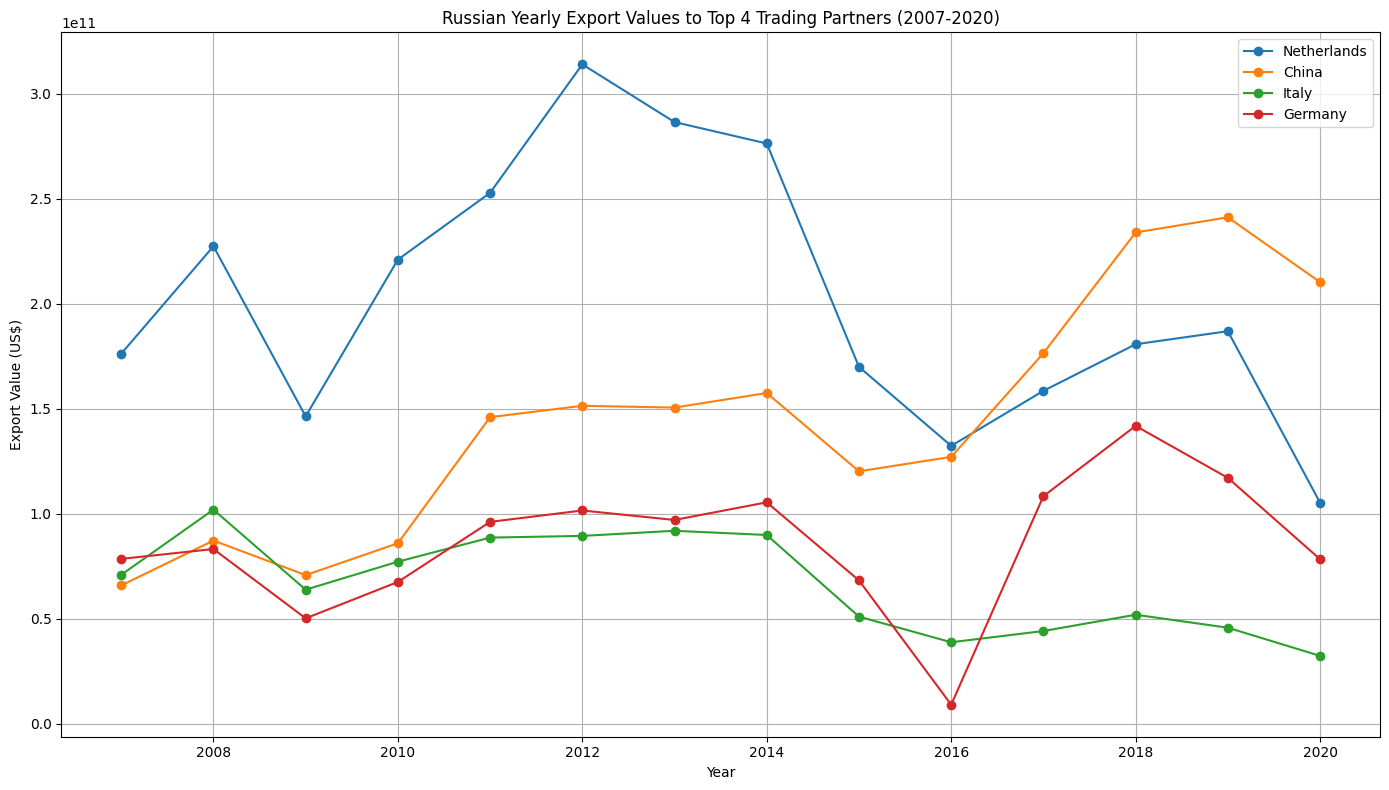

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected DataFrame with proper list definitions and separators
df = pd.DataFrame({
    'year': [i for i in range(2007, 2021)],
    'Netherlands': [176116101007, 227265898296, 146275732552, 220919610094, 252723778208, 313899685449, 286410837444, 276220153564, 169847585237, 132239670455, 158432804138, 180613884404, 186833113566, 105197741920],
    'China': [65786710001, 87140296472, 70693625318, 85866143759, 145903868986, 151319494371, 150469047190, 157402536327, 120116172706, 126982625534, 176366511075, 233849259740, 241070548351, 210191436556],
    'Italy': [70837259139, 101857681977, 63752720178, 77088791421, 88558870486, 89364572765, 91795374315, 89798099014, 50916893777, 38719392974, 44067945628, 51825822429, 45650036621, 32244566116],
    'Germany': [78414783514, 83111193691, 50106833802, 67428493059, 96039558094, 101464690561, 96951448776, 105346766315, 68170721044, 8984865157, 108260819821, 141746026830, 116995161586, 78269457115]
})

# Plotting the export values for each country
plt.figure(figsize=(14, 8))

# Plot for each country
for country in ['Netherlands', 'China', 'Italy', 'Germany']:
    plt.plot(df['year'], df[country], marker='o', linestyle='-', label=country)

# Updating the title and adding a legend
plt.title('Russian Yearly Export Values to Top 4 Trading Partners (2007-2020)')
plt.xlabel('Year')
plt.ylabel('Export Value (US$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Consistency: The frequency of a country appears to be the top 5 trading partners annually (in terms of export values). 

The graph shows Russia's annual export value to these countries.

Among the top 10 trading partners, Netherlands, China, Italy, and Germany are the most consistent countries on the list. 

The trend looks similar among all the countries 

2014 and 2019 have significant reductions in all the countries

Since 2014, Russia's exports to the Netherlands have dropped significantly,  and China has become its top trading partner since 2017.



In [47]:
%%sql
SELECT t.year, SUM(t.value) AS yearly_export_value
FROM TRADES t
JOIN PARTNER p ON t.partner_key = p.key
WHERE p.name = 'USA' -- or p.iso = 'USA' 
GROUP BY t.year
ORDER BY t.year;


 * postgresql://student@/final_project
14 rows affected.


year,yearly_export_value
2007,33942957859
2008,53761928842
2009,34053849448
2010,51989783789
2011,67384953855
2012,57648380653
2013,50058183882
2014,43760487582
2015,38470653945
2016,45057668921


## Q1.3: The trend of Russia Export to USA in terms of total value

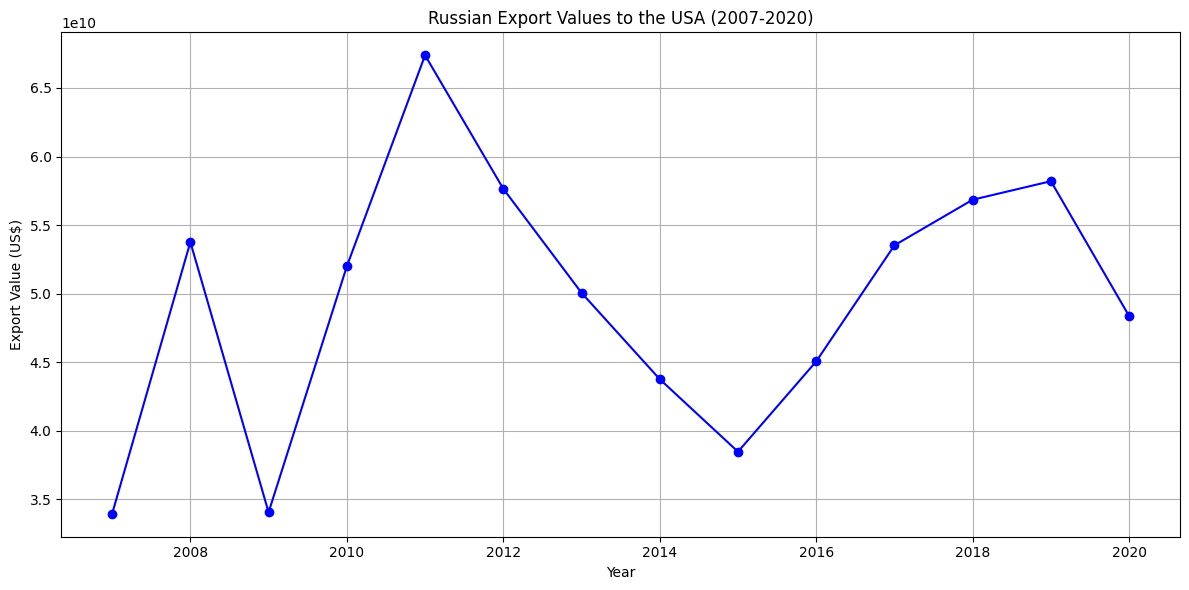

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame({
    'year': [i for i in range(2007, 2021)],
    'USA': [33942957859,53761928842,34053849448,51989783789,67384953855,57648380653,50058183882,43760487582,38470653945,45057668921,53524722585,56849284587,58199386600,48358953036] 
})

# Now we can plot the USA export values across the years.
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['USA'], marker='o', linestyle='-', color='blue')

plt.title('Russian Export Values to the USA (2007-2020)')
plt.xlabel('Year')
plt.ylabel('Export Value (US$)')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels if needed
plt.show()


The Unique One: Russian Export Value to the USA

It's well known that Russia has had a complicated economic relationship with the U.S.

The graph shows high fluctuation in annual export value to the U.S.


## Q2: How did major economic events, such as global recessions or geopolitical events, impact Russia's export patterns?

## Changing a_code can control the scope of the commodity definition.
petroleum is the highest in total value

***c_code represents different types of goods, and a_code represents the range of c_code. The longer the c_code is, the more detailed the description of the product category.***

By setting a_code = 1 and summing the total_value, we can see which kind of commodity create the most export trade value in total.

Obtaining total transaction values for commodities with a_code=1 between 2007 and 2020, correlating TRADES to COMMODITY using keys, and placing orders based on total value.

In [49]:
%%sql
SELECT C.a_code, C.c_code, C.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE a_code = 1
  AND year BETWEEN 2007 AND 2020
    GROUP BY C.a_code, C.c_code, C.name
ORDER BY total_value DESC;

 * postgresql://student@/final_project
10 rows affected.


a_code,c_code,name,total_value
1,3,"Mineral fuels, lubricants and related materials",3000379661703
1,6,Manufactured goods classified chiefly by material,685386386723
1,9,Commodities and transactions not classified elsewhere in the SITC,366696401429
1,5,"Chemicals and related products, n.e.s.",267468620964
1,7,Machinery and transport equipment,219839203887
1,2,"Crude materials, inedible, except fuels",207198990767
1,0,Food and live animals,173790999547
1,8,Miscellaneous manufactured articles,55601678816
1,4,"Animal and vegetable oils, fats and waxes",24809884767
1,1,Beverages and tobacco,12924349571


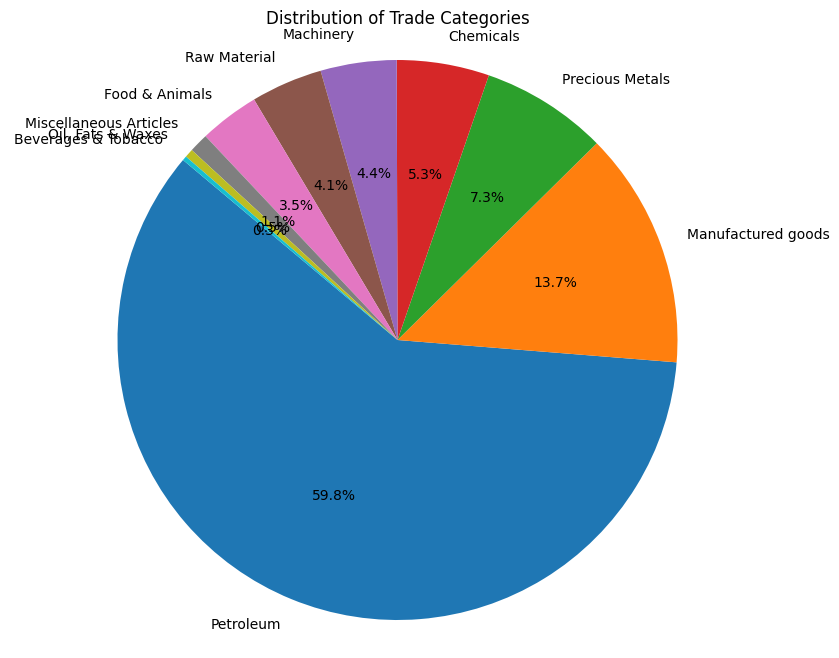

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Petroleum', 'Manufactured goods', 'Precious Metals', 'Chemicals', 'Machinery', 'Raw Material', 
              'Food & Animals', 'Miscellaneous Articles', 'Oil, Fats & Waxes', 'Beverages & Tobacco']
values = [3000379661703, 685386386723, 366696401429, 267468620964, 219839203887, 207198990767,
          173790999547, 55601678816, 24809884767, 12924349571]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trade Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

#### TOP1. (3) Petroleum
#### TOP2. (6) Manufactured goods
#### TOP3. (9) Precious Metals
#### TOP4. (5) Chemicals
#### TOP5. (7) Machinery
#### TOP6. (2) Raw Materials
#### TOP7. (0) Food & Animals
#### TOP8. (8) Miscellaneous Articles
#### TOP9. (4) Oil, Fats & Waxers
#### TOP10.(1) Beverages & Tobacco

**Petroleum forms 60% of Russia's total export revenue, playing a crucial role in the nation's economic profile.**

From 2007 to 2020, the total value of petroleum exports reached US$3trillion, exceeding the second largest commodity, "Manufactured goods," by more than fourfold.


## FIND OUT the fluctuation of TOP 10 commodity from 2007-2020

## TOP 1: Petroleum total value Trend 2007-2020

Obtaining total transaction values for the petroleum commodity from 2007 to 2020, grouping them by year, and ranking them by commodity code.

In [51]:
%%sql
SELECT year, C.a_code, C.c_code, 'Petroleum' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '3'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,3,Petroleum,173278657888
2008,1,3,Petroleum,240900896720
2009,1,3,Petroleum,150715282541
2010,1,3,Petroleum,212555485724
2011,1,3,Petroleum,282261315294
2012,1,3,Petroleum,292154026207
2013,1,3,Petroleum,296242906669
2014,1,3,Petroleum,282504170578
2015,1,3,Petroleum,167676312454
2016,1,3,Petroleum,140765032965


In [52]:
#Setting Matplotlib to directly display charts specifically a bar chart.
%matplotlib inline

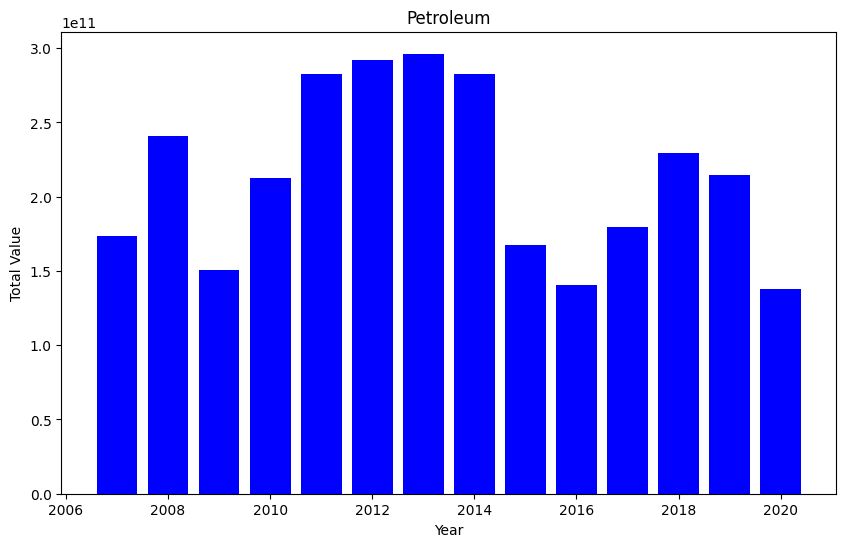

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
petroleum_values = [173278657888, 240900896720, 150715282541, 212555485724, 282261315294, 292154026207,
                    296242906669, 282504170578, 167676312454, 140765032965, 179405851909, 229318587135,
                    214677308383, 137923827236]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, petroleum_values, color='blue')
plt.title('Petroleum')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

**Petroleum(Petroleum Products):**

**Total Value Trend (2007-2020): The total export value of petroleum products has fluctuated over the years, with a peak around 2012 and a notable decline in 2020.**


## TOP 2: Manufactured goods total value Trend 2007-2020

Obtaining total transaction values for the Manufactured goods from 2007 to 2020, grouping them by year and commodity attributes.

In [54]:
%%sql
SELECT year, C.a_code, C.c_code, 'Manufactured goods' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '6'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,6,Manufactured goods,54223170387
2008,1,6,Manufactured goods,56289772960
2009,1,6,Manufactured goods,37123550220
2010,1,6,Manufactured goods,44474338326
2011,1,6,Manufactured goods,50403848006
2012,1,6,Manufactured goods,54577627594
2013,1,6,Manufactured goods,51008301342
2014,1,6,Manufactured goods,50072572757
2015,1,6,Manufactured goods,41544271512
2016,1,6,Manufactured goods,40095037363


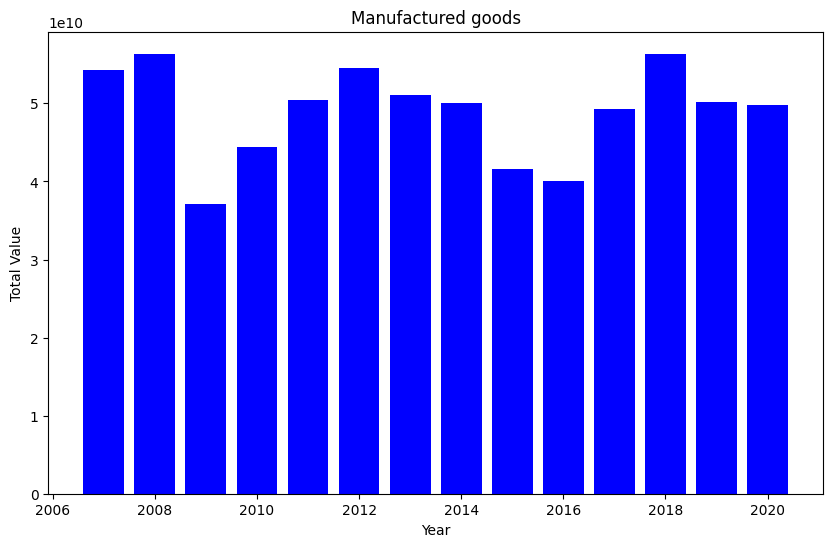

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [54223170387, 56289772960, 37123550220, 44474338326, 50403848006, 54577627594, 51008301342,
                50072572757, 41544271512, 40095037363, 49304945178, 56358091763, 50145457537, 49765401778]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Manufactured goods')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

## TOP 3: Precious Metals total value Trend 2007-2020

Obtaining the total transaction values for Precious Metals from 2007 to 2020, grouped by year and commodity attributes.

In [56]:
%%sql
SELECT year, C.a_code, C.c_code, 'Precious Metals' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '9'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,9,Precious Metals,11286623227
2008,1,9,Precious Metals,3427517332
2009,1,9,Precious Metals,4069086965
2010,1,9,Precious Metals,22620228512
2011,1,9,Precious Metals,23086187235
2012,1,9,Precious Metals,17837858545
2013,1,9,Precious Metals,18786452002
2014,1,9,Precious Metals,3125611383
2015,1,9,Precious Metals,1512331681
2016,1,9,Precious Metals,39193300933


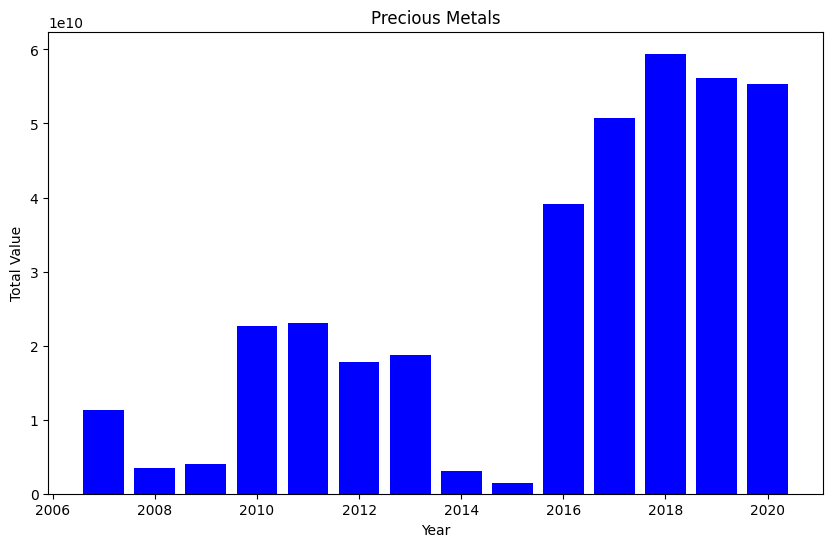

In [57]:
import matplotlib.pyplot as plt

# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [11286623227, 3427517332, 4069086965, 22620228512, 23086187235, 17837858545, 18786452002,
                3125611383, 1512331681, 39193300933, 50791600482, 59420400842, 56199960626, 55339241664]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Precious Metals')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

**Precious Metals:**

**Total Value Trend (2007-2020): Since 2016, precious metals exports have significantly exceeded previous years' performance.**


## TOP 4: Chemicals total value Trend 2007-2020

Obtaining the total transaction values for Chemicals from 2007 to 2020, grouped by year and commodity attributes.

In [58]:
%%sql
SELECT year, C.a_code, C.c_code, 'Chemicals' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '5'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,5,Chemicals,14683735806
2008,1,5,Chemicals,22359759439
2009,1,5,Chemicals,12483410560
2010,1,5,Chemicals,16071560876
2011,1,5,Chemicals,21776658380
2012,1,5,Chemicals,23482946570
2013,1,5,Chemicals,22202159392
2014,1,5,Chemicals,22165608180
2015,1,5,Chemicals,18804598539
2016,1,5,Chemicals,16448633406


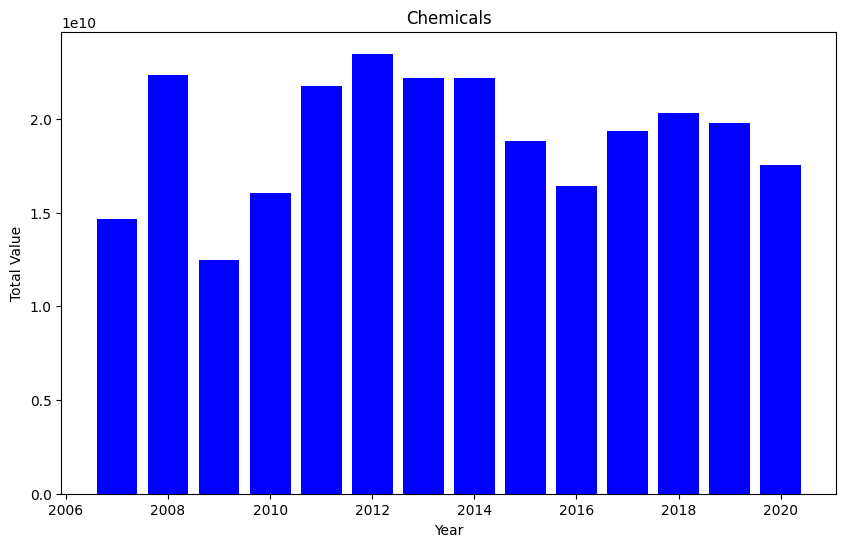

In [59]:
import matplotlib.pyplot as plt

# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [14683735806, 22359759439, 12483410560, 16071560876, 21776658380, 23482946570, 22202159392,
                22165608180, 18804598539, 16448633406, 19341398467, 20301977252, 19798117693, 17548056404]


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Chemicals')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

## TOP 5: Machinery total value Trend 2007-2020

Obtaining the total transaction values for Machinery from 2007 to 2020, grouped by year and commodity attributes.

In [60]:
%%sql
SELECT year, C.a_code, C.c_code, 'Machinery' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '7'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,7,Machinery,13207498692
2008,1,7,Machinery,15737187492
2009,1,7,Machinery,10834966922
2010,1,7,Machinery,10929392396
2011,1,7,Machinery,11679551446
2012,1,7,Machinery,16746728323
2013,1,7,Machinery,19192231074
2014,1,7,Machinery,18304308595
2015,1,7,Machinery,16997412828
2016,1,7,Machinery,16736591458


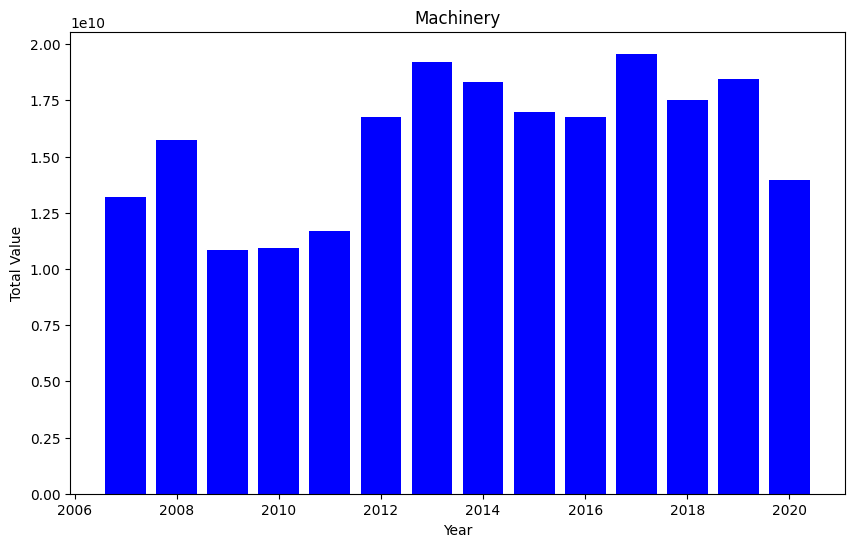

In [61]:
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [13207498692, 15737187492, 10834966922, 10929392396, 11679551446, 16746728323, 19192231074,
                18304308595, 16997412828, 16736591458, 19572692973, 17531736381, 18426563395, 13942341912]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Machinery')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

## TOP 6: Raw Materials total value Trend 2007-2020

Obtaining the total transaction values for Raw Materials from 2007 to 2020, grouped by year and commodity attributes.

In [62]:
%%sql
SELECT year, C.a_code, C.c_code, 'Raw Materials' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '2'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,2,Raw Materials,14423482578
2008,1,2,Raw Materials,16728140423
2009,1,2,Raw Materials,9228275888
2010,1,2,Raw Materials,12454623247
2011,1,2,Raw Materials,17086232225
2012,1,2,Raw Materials,16141332646
2013,1,2,Raw Materials,15493733668
2014,1,2,Raw Materials,15177964396
2015,1,2,Raw Materials,11736367963
2016,1,2,Raw Materials,12044475701


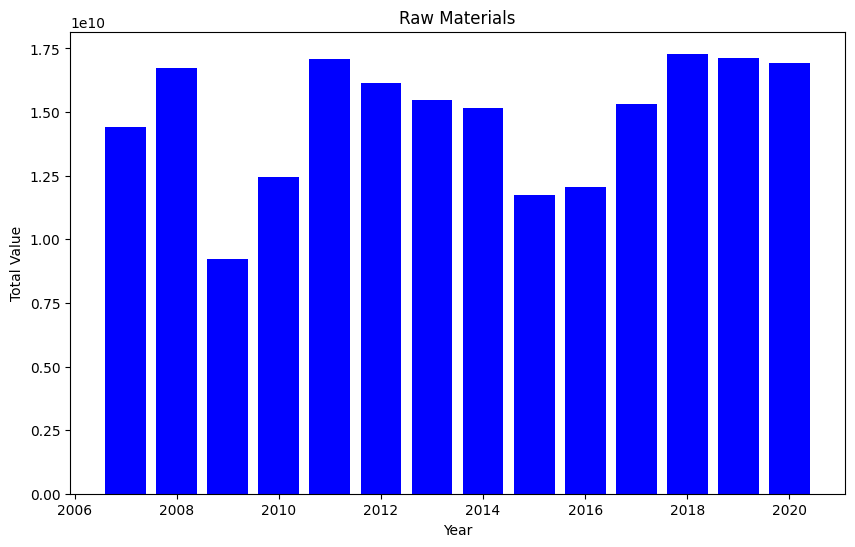

In [63]:
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [14423482578, 16728140423, 9228275888, 12454623247, 17086232225, 16141332646, 15493733668,
                15177964396, 11736367963, 12044475701, 15317366632, 17293146497, 17129555282, 16944293621]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Raw Materials')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

## TOP 7: Food & Animals total value Trend 2007-2020

Obtaining the total transaction values for Food & Animals from 2007 to 2020, grouped by year and commodity attributes.

In [64]:
%%sql
SELECT year, C.a_code, C.c_code, 'Food & Animals' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '0'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,0,Food & Animals,6924574851
2008,1,0,Food & Animals,6541833071
2009,1,0,Food & Animals,7536639711
2010,1,0,Food & Animals,6223258418
2011,1,0,Food & Animals,9300243444
2012,1,0,Food & Animals,12546003887
2013,1,0,Food & Animals,11819987971
2014,1,0,Food & Animals,14208412859
2015,1,0,Food & Animals,12153269297
2016,1,0,Food & Animals,12718757295


**Food & Animals:**

 **Total Value Trend (2007-2020): Stable and sustained growth from 2007 to 2020.**


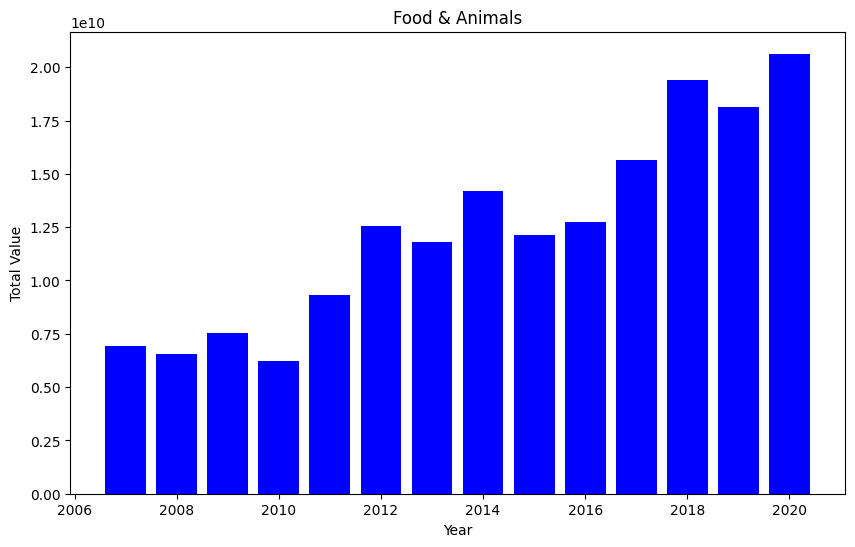

In [65]:
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [6924574851, 6541833071, 7536639711, 6223258418, 9300243444, 12546003887, 11819987971,
                14208412859, 12153269297, 12718757295, 15663019546, 19408545954, 18113284566, 20633168677]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Food & Animals')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

## TOP 8: Miscellaneous Articles total value Trend 2007-2020

Obtaining the total transaction values for Miscellaneous Articles from 2007 to 2020, grouped by year and commodity attributes.

In [66]:
%%sql
SELECT year, C.a_code, C.c_code, 'Miscellaneous Articles' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '8'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,8,Miscellaneous Articles,2573875298
2008,1,8,Miscellaneous Articles,2931677414
2009,1,8,Miscellaneous Articles,2316855665
2010,1,8,Miscellaneous Articles,2325520937
2011,1,8,Miscellaneous Articles,2269669118
2012,1,8,Miscellaneous Articles,4401694817
2013,1,8,Miscellaneous Articles,5274209941
2014,1,8,Miscellaneous Articles,5592727873
2015,1,8,Miscellaneous Articles,5235357984
2016,1,8,Miscellaneous Articles,5652661550


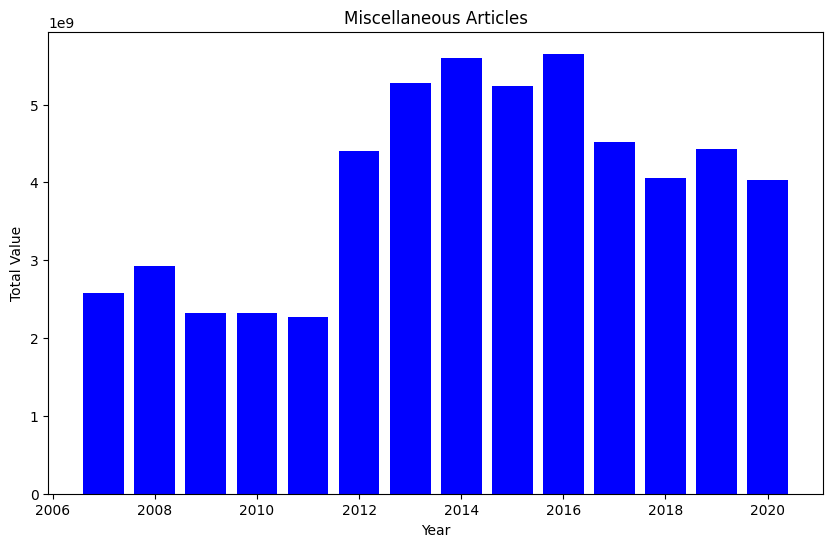

In [67]:
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [2573875298, 2931677414, 2316855665, 2325520937, 2269669118, 4401694817, 5274209941,
                5592727873, 5235357984, 5652661550, 4515876951, 4062379352, 4424546744, 4024625172]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Miscellaneous Articles')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

## TOP 9: Oil, Fats & Waxes total value Trend 2007-2020

Obtaining the total transaction values for Oil, Fats & Waxers from 2007 to 2020, grouped by year and commodity attributes.

In [68]:
%%sql
SELECT year, C.a_code, C.c_code, 'Oil, Fats & Waxes' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '4'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,4,"Oil, Fats & Waxes",500101942
2008,1,4,"Oil, Fats & Waxes",806848487
2009,1,4,"Oil, Fats & Waxes",778236483
2010,1,4,"Oil, Fats & Waxes",584203921
2011,1,4,"Oil, Fats & Waxes",946625530
2012,1,4,"Oil, Fats & Waxes",2016786142
2013,1,4,"Oil, Fats & Waxes",1952423445
2014,1,4,"Oil, Fats & Waxes",2015265089
2015,1,4,"Oil, Fats & Waxes",1665481462
2016,1,4,"Oil, Fats & Waxes",1987658368


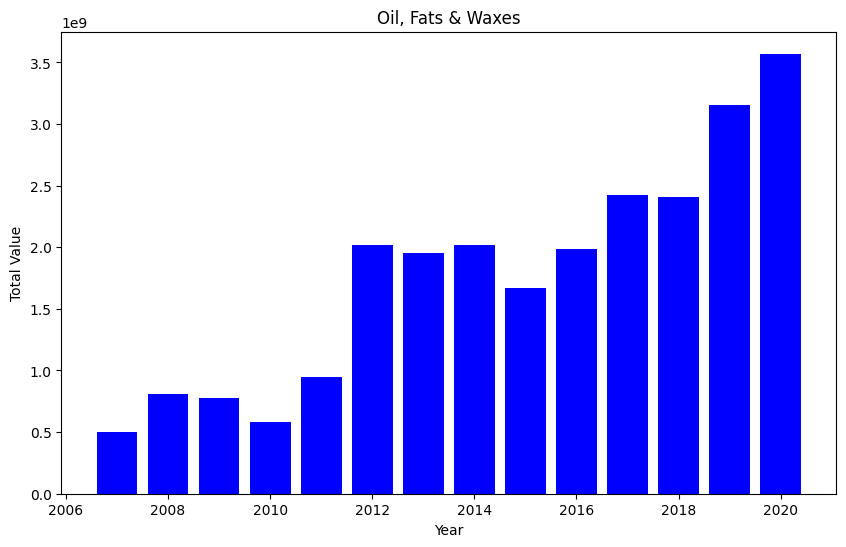

In [69]:
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [500101942, 806848487, 778236483, 584203921, 946625530, 2016786142, 1952423445,
                2015265089, 1665481462, 1987658368, 2425323478, 2408383364, 3152058587, 3570488469]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Oil, Fats & Waxes')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

**Oil, Fats & Waxes:**
**Total Value Trend (2007-2020): It exhibited significant growth starting in 2012 and reached its peak in 2020.**


## TOP 10: Beverages & Tobacco total value Trend 2007-2020

Obtaining the total transaction values for Beverages & Tobacco from 2007 to 2020, grouped by year and commodity attributes.

In [70]:
%%sql
SELECT year, C.a_code, C.c_code, 'Beverages & Tobacco' AS name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code = '1'
GROUP BY year, C.a_code, C.c_code, C.name;

 * postgresql://student@/final_project
14 rows affected.


year,a_code,c_code,name,total_value
2007,1,1,Beverages & Tobacco,680288541
2008,1,1,Beverages & Tobacco,875540946
2009,1,1,Beverages & Tobacco,796615621
2010,1,1,Beverages & Tobacco,600222808
2011,1,1,Beverages & Tobacco,683714998
2012,1,1,Beverages & Tobacco,1035312079
2013,1,1,Beverages & Tobacco,1127497872
2014,1,1,Beverages & Tobacco,1197127791
2015,1,1,Beverages & Tobacco,1052677903
2016,1,1,Beverages & Tobacco,982731034


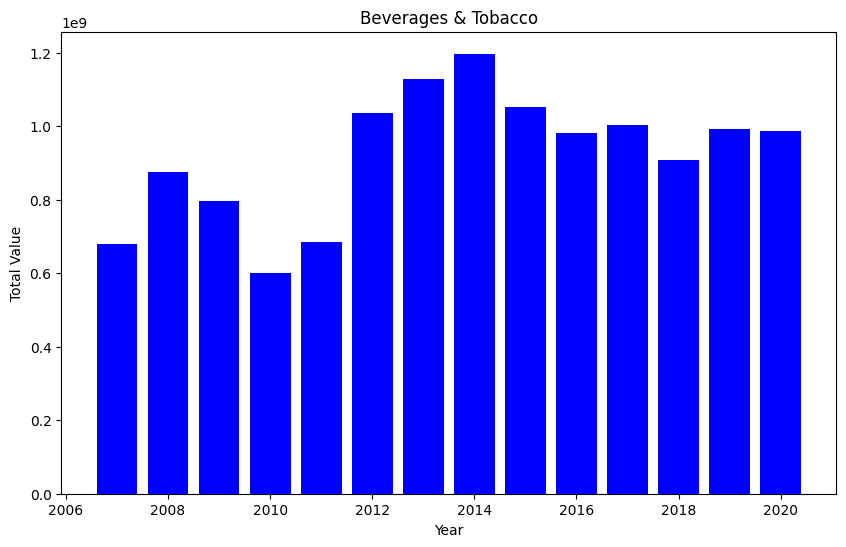

In [71]:
# Data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_values = [680288541, 875540946, 796615621, 600222808, 683714998, 1035312079, 1127497872,
                1197127791, 1052677903, 982731034, 1003510632, 907977501, 993052341, 988079504]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_values, color='blue')
plt.title('Beverages & Tobacco')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.show()

# Q3: Have there been significant changes in Russia's major trading countries over the years? Which countries are increasing their trading ties with Russia?

**2009 seems to be lowest performing year for Russian export.
EXTERNAL FACTOR BEING – Great Recession 2007-2009**


In [72]:
%%sql
SELECT Year, SUM(T.value) AS total_value
FROM TRADES T
group by year

 * postgresql://student@/final_project
14 rows affected.


year,total_value
2007,1259215835013
2008,1578443038842
2009,974397635832
2010,1403252839346
2011,1793386863598
2012,1880388355990
2013,1869415273990
2014,1752205574253
2015,1202457037010
2016,1243431912691


In [73]:
%matplotlib inline

<BarContainer object of 14 artists>

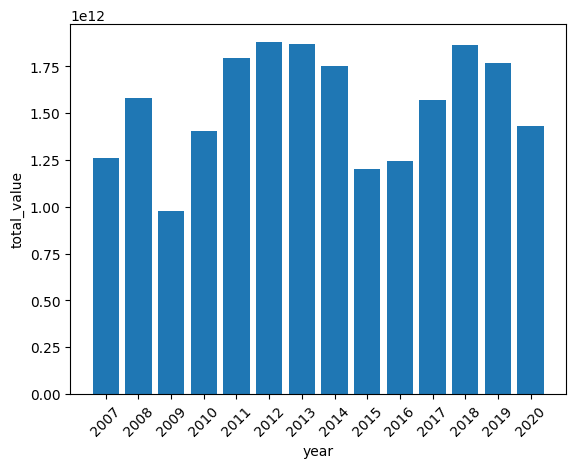

In [74]:
_.bar()

**We could see an decline in export of Russia's top commmodities such as petroleum, Manufactured goods etc. during 2015. DUE TO RUSSIAN FINANCIAL CRISIS IN 2014**

In [75]:
%%sql
SELECT year, C.c_code, C.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY C ON T.commodity_key = C.key -- Replace with the actual column that links TRADES to COMMODITY
WHERE C.c_code in ('0', '3', '6','5', '7') AND YEAR between 2014 and 2015
GROUP BY year, C.c_code, C.c_code, C.name
ORDER BY year

 * postgresql://student@/final_project
10 rows affected.


year,c_code,name,total_value
2014,0,Food and live animals,14208412859
2014,3,"Mineral fuels, lubricants and related materials",282504170578
2014,5,"Chemicals and related products, n.e.s.",22165608180
2014,6,Manufactured goods classified chiefly by material,50072572757
2014,7,Machinery and transport equipment,18304308595
2015,0,Food and live animals,12153269297
2015,3,"Mineral fuels, lubricants and related materials",167676312454
2015,5,"Chemicals and related products, n.e.s.",18804598539
2015,6,Manufactured goods classified chiefly by material,41544271512
2015,7,Machinery and transport equipment,16997412828


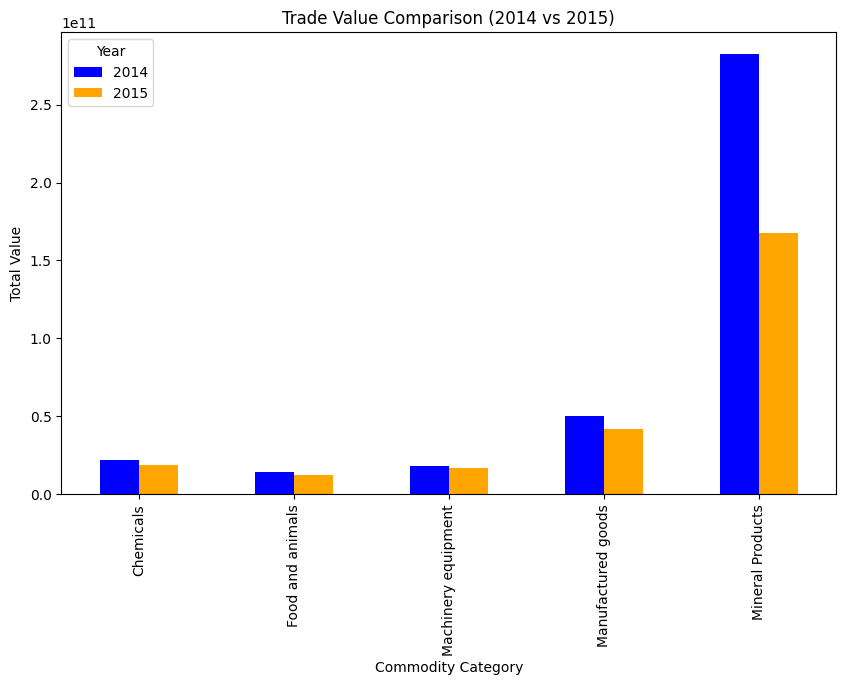

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    'year': [2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015],
    'c_code': [3, 5, 6, 7, 0, 3, 5, 6, 7, 0],
    'name': ['Mineral Products', 'Chemicals',
             'Manufactured goods', 'Machinery equipment',
             'Food and animals',
             'Mineral Products', 'Chemicals',
             'Manufactured goods', 'Machinery equipment','Food and animals'],
    'total_value': [282504170578, 22165608180, 50072572757, 18304308595, 14208412859,
                    167676312454, 18804598539, 41544271512, 16997412828, 12153269297]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame for better plotting
pivot_df = df.pivot(index='name', columns='year', values='total_value')

# Plotting a bar chart
ax = pivot_df.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
ax.set_xlabel('Commodity Category')
ax.set_ylabel('Total Value')
ax.set_title('Trade Value Comparison (2014 vs 2015)')
ax.legend(title='Year', labels=['2014', '2015'])
plt.show()



**Despite Mineral products such as Petrol being Russias most traded commodity, they should also focus on increasing production of other commodities because when petroleum takes a hit, they other commodities still help in maintaining their economy**

**The trade restrictions implied on Russia due to the conflict between Russia and Ukraine in 2014 led to some decline in export to European Countries**

In [77]:
%%sql
SELECT year, p.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN PARTNER p ON T.partner_key = p.key
WHERE (p.name = 'United Kingdom' OR p.name = 'Netherlands' OR p.name = 'Germany' OR p.name = 'Italy' OR p.name = 'Turkey' OR p.name = 'France' or p.name = 'Ukraine')
      AND (YEAR = 2014 OR YEAR = 2015)
GROUP BY year, p.name
ORDER BY year;


 * postgresql://student@/final_project
14 rows affected.


year,name,total_value
2014,France,20023076134
2014,Germany,105346766315
2014,Italy,89798099014
2014,Netherlands,276220153564
2014,Turkey,66794572063
2014,Ukraine,45384253080
2014,United Kingdom,32956466997
2015,France,12936635219
2015,Germany,68170721044
2015,Italy,50916893777


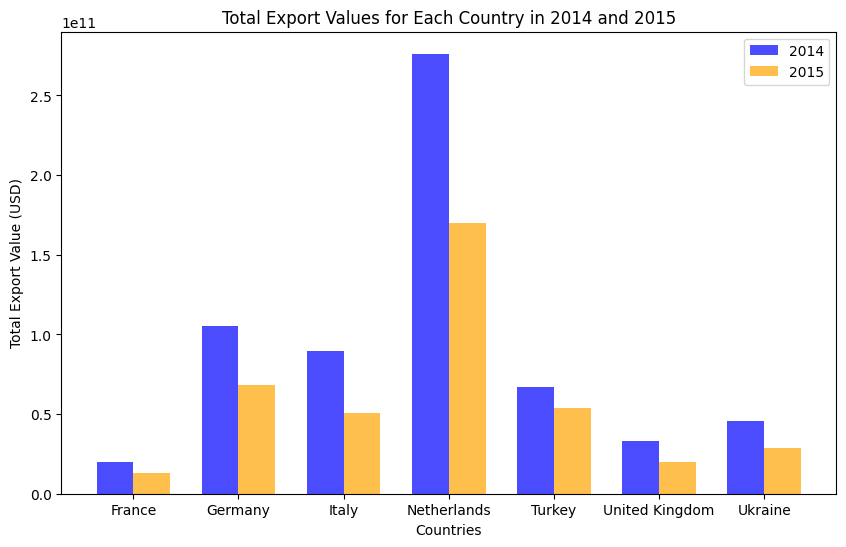

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Data
countries = ['France', 'Germany', 'Italy', 'Netherlands', 'Turkey', 'United Kingdom', 'Ukraine']
values_2014 = [20023076134, 105346766315, 89798099014, 276220153564, 66794572063, 32956466997, 45384253080]
values_2015 = [12936635219, 68170721044, 50916893777, 169847585237, 53523307879, 19832700194, 28652486972]

# Set the bar width
bar_width = 0.35

# Calculate the position of bars for 2014 and 2015
bar_positions_2014 = np.arange(len(countries))
bar_positions_2015 = bar_positions_2014 + bar_width

# Plotting
plt.figure(figsize=(10, 6))

# Plot 2014 data
plt.bar(bar_positions_2014, values_2014, width=bar_width, color='blue', label='2014', alpha=0.7)

# Plot 2015 data
plt.bar(bar_positions_2015, values_2015, width=bar_width, color='orange', label='2015', alpha=0.7)

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Total Export Value (USD)')
plt.title('Total Export Values for Each Country in 2014 and 2015')
plt.xticks(bar_positions_2014 + bar_width / 2, countries)  # Set x-axis ticks at the center of grouped bars
plt.legend()

# Show the plot
plt.show()


**Due to the Russia's annexation of  Crimea in 2014 European countries withdrew part of their import from Russia leading to a decline in trade value.**

In [79]:
%%sql
SELECT year, p.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN PARTNER p ON T.partner_key = p.key
WHERE (YEAR = 2014 or YEAR = 2015 or YEAR = 2016 or YEAR = 2017 or year = 2018) AND p.name in ('China', 'Netherlands', 'Germany', 'Italy', 'Japan')
GROUP BY year, p.name
ORDER BY total_value desc

 * postgresql://student@/final_project
25 rows affected.


year,name,total_value
2014,Netherlands,276220153564
2018,China,233849259740
2018,Netherlands,180613884404
2017,China,176366511075
2015,Netherlands,169847585237
2017,Netherlands,158432804138
2014,China,157402536327
2018,Germany,141746026830
2016,Netherlands,132239670455
2016,China,126982625534


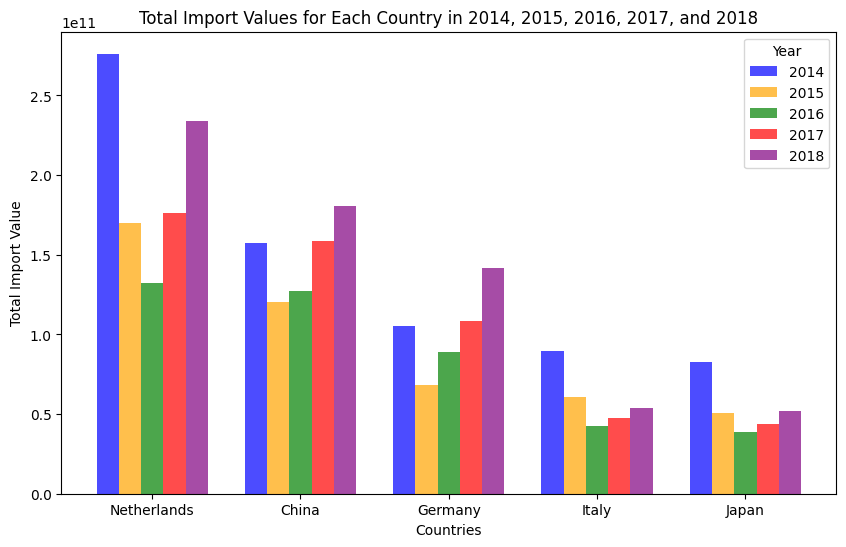

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'Year': [2014, 2018, 2018, 2017, 2015, 2017, 2014, 2018, 2016, 2016, 2015, 2017, 2014, 2014, 2016, 2014, 2015, 2015, 2018, 2018, 2015, 2017, 2017, 2016, 2016],
    'Country': ['Netherlands', 'China', 'Netherlands', 'China', 'Netherlands', 'Netherlands', 'China', 'Germany', 'Netherlands', 'China', 'China', 'Germany', 'Germany', 'Italy', 'Germany', 'Italy', 'Germany', 'Japan', 'Germany', 'Italy', 'Japan', 'Japan', 'Italy', 'Japan', 'Italy'],
    'Total_Value': [276220153564, 233849259740, 180613884404, 176366511075, 169847585237, 158432804138, 157402536327, 141746026830, 132239670455, 126982625534, 120116172706, 108260819821, 105346766315, 89798099014, 88984865157, 82497825917, 68170721044, 60792113769, 53750863317, 51825822429, 50916893777, 47536799583, 44067945628, 42411339579, 38719392974]
}

df = pd.DataFrame(data)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a color map for different years
colors = {2014: 'blue', 2015: 'orange', 2016: 'green', 2017: 'red', 2018: 'purple'}

# Calculate the bar positions
bar_positions = np.arange(len(df['Country'].unique()))
bar_width = 0.15  # Adjust the width based on your preference

# Plot the data for each year
for i, year in enumerate(sorted(df['Year'].unique())):
    subset = df[df['Year'] == year]
    ax.bar(bar_positions + i * bar_width, subset['Total_Value'], width=bar_width, color=colors[year], label=str(year), alpha=0.7)

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Total Import Value')
plt.title('Total Import Values for Each Country in 2014, 2015, 2016, 2017, and 2018')
plt.legend(title='Year')

# Set x-axis ticks and labels
plt.xticks(bar_positions + 2 * bar_width, df['Country'].unique())

# Show the plot
plt.show()


**The graph shows us the countries which aided Russia after the Russian financial crisis in 2014.**

# INTRESTING INSIGHTS

**97% of Malta's import from Russia is Petroleum. While 99.5% for Gibraltar**

In [81]:
%%sql
SELECT p.name, c.a_code,c.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN PARTNER p ON T.partner_key = p.key
JOIN COMMODITY c ON T.commodity_key = c.key 
WHERE c.a_code = '1' AND p.name = 'Malta'
GROUP BY p.name, c.a_code, c.name
ORDER BY total_value desc


 * postgresql://student@/final_project
9 rows affected.


name,a_code,name_1,total_value
Malta,1,"Mineral fuels, lubricants and related materials",31219984180
Malta,1,Machinery and transport equipment,821281595
Malta,1,Miscellaneous manufactured articles,57760273
Malta,1,"Chemicals and related products, n.e.s.",43541774
Malta,1,Commodities and transactions not classified elsewhere in the SITC,10769366
Malta,1,Manufactured goods classified chiefly by material,10117272
Malta,1,Food and live animals,5368921
Malta,1,"Crude materials, inedible, except fuels",237518
Malta,1,Beverages and tobacco,173834


In [82]:
#Calculating the % value of Malta Petroleum
(31219984180) / (31219984180 + 821281595 + 57760273 + 43541774 + 10769366 + 10117272 + 5368921 + 237518 + 173834) * 100 

97.04919759242443

**SIMILARLY FOR GIBRALTAR**

In [83]:
%%sql
SELECT p.name, c.a_code,c.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN PARTNER p ON T.partner_key = p.key
JOIN COMMODITY c ON T.commodity_key = c.key 
WHERE c.a_code = '1' AND p.name = 'Gibraltar'
GROUP BY p.name, c.a_code, c.name
ORDER BY total_value desc


 * postgresql://student@/final_project
7 rows affected.


name,a_code,name_1,total_value
Gibraltar,1,"Mineral fuels, lubricants and related materials",4654243272
Gibraltar,1,Manufactured goods classified chiefly by material,21678893
Gibraltar,1,"Crude materials, inedible, except fuels",693234
Gibraltar,1,Machinery and transport equipment,202597
Gibraltar,1,"Chemicals and related products, n.e.s.",59886
Gibraltar,1,Miscellaneous manufactured articles,12465
Gibraltar,1,Beverages and tobacco,1200


In [84]:
#Calculating the % value of Gibraltar Petroleum
(4654243272) / (4654243272 + 21678893 + 693234 + 202597 + 59886 + 12465 + 1200) * 100

99.51574085538657

**Since Petroleum is Russia's most exported commodity lets look at which partners import the highest amount of it from Russia**

In [85]:
%%sql
SELECT c.c_code, p.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN COMMODITY c on T.commodity_key = c.key
JOIN PARTNER p ON T.partner_key = p.key
WHERE c.c_code = '33'
GROUP BY p.name, c.c_code
ORDER BY total_value desc
limit 10


 * postgresql://student@/final_project
10 rows affected.


c_code,name,total_value
33,Netherlands,562359747093
33,China,288921634416
33,Italy,227699140502
33,Germany,181031766189
33,Poland,150228871545
33,Rep. of Korea,109430922917
33,Japan,84375150221
33,Finland,82683555665
33,Turkey,82286220269
33,USA,69547477283


<BarContainer object of 10 artists>

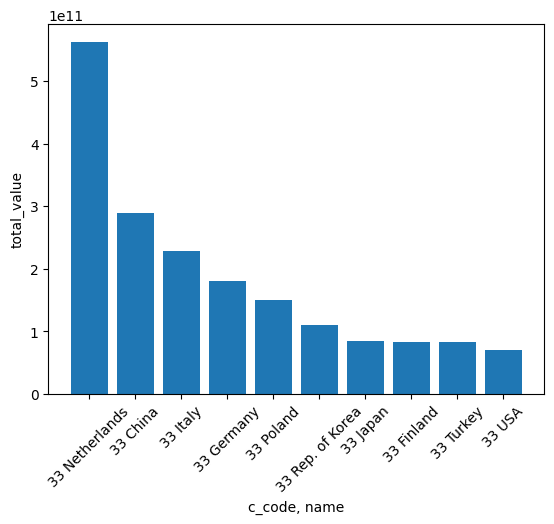

In [86]:
%matplotlib inline
_.bar()

**Due to the Russia - Ukraine conflict in 2014, top european countries like Netherlands withdrew part of their import from Russia. But China had increased their's which displays their alliance.** 

In [87]:
%%sql
SELECT year, p.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN PARTNER p ON T.partner_key = p.key
WHERE year = '2014'
GROUP BY p.name, year
ORDER BY total_value desc
limit 10


 * postgresql://student@/final_project
10 rows affected.


year,name,total_value
2014,Netherlands,276220153564
2014,China,157402536327
2014,Germany,105346766315
2014,Italy,89798099014
2014,Japan,82497825917
2014,Rep. of Korea,76070679253
2014,Turkey,66794572063
2014,Poland,65198002723
2014,Latvia,51330563641
2014,Belarus,49619523292


In [88]:
%%sql
SELECT year, p.name, SUM(T.value) AS total_value
FROM TRADES T
JOIN PARTNER p ON T.partner_key = p.key
WHERE year = '2015'
GROUP BY p.name, year
ORDER BY total_value desc
limit 10


 * postgresql://student@/final_project
10 rows affected.


year,name,total_value
2015,Netherlands,169847585237
2015,China,120116172706
2015,Germany,68170721044
2015,Japan,60792113769
2015,Rep. of Korea,56035410980
2015,Turkey,53523307879
2015,Italy,50916893777
2015,Poland,40033870894
2015,USA,38470653945
2015,Belarus,37284929064


**We calculated the individual % contribution of Netherlands and China in years 2014  & 2015 to plot the graph below**

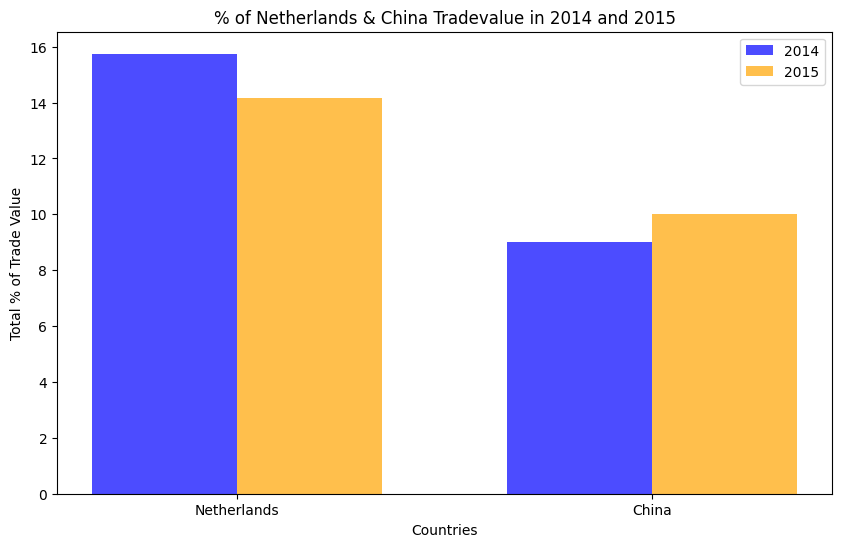

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Data
countries = [ 'Netherlands', 'China']
values_2014 = [15.75, 9.00 ]
values_2015 = [14.15, 10.00]

# Set the bar width
bar_width = 0.35

# Calculate the position of bars for 2014 and 2015
bar_positions_2014 = np.arange(len(countries))
bar_positions_2015 = bar_positions_2014 + bar_width

# Plotting
plt.figure(figsize=(10, 6))

# Plot 2014 data
plt.bar(bar_positions_2014, values_2014, width=bar_width, color='blue', label='2014', alpha=0.7)

# Plot 2015 data
plt.bar(bar_positions_2015, values_2015, width=bar_width, color='orange', label='2015', alpha=0.7)

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Total % of Trade Value')
plt.title('% of Netherlands & China Tradevalue in 2014 and 2015')
plt.xticks(bar_positions_2014 + bar_width / 2, countries)  # Set x-axis ticks at the center of grouped bars
plt.legend()

# Show the plot
plt.show()


 **China being Russia's close ally, despite Euro-Western sanctions, seemed to maintain a good trade relationship.**